# Logistic Regression and SVM

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

np.random.seed(42)

In [36]:
# candy-data taken from  https://www.kaggle.com/fivethirtyeight/ the-ultimate-halloween-candy-power-ranking/

candy = pd.read_csv("candy-data.csv")
names = candy[['competitorname']]
Y = candy[['chocolate']]
X = candy[['fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent']]

In [37]:
divide_number = np.floor((2 / 3) * len(candy))
X_train = X.loc[:divide_number]
X_test = X.loc[divide_number:]
Y_train = Y.loc[:divide_number]
Y_test = Y.loc[divide_number:]

In [38]:
reg = LogisticRegression()
reg.fit(X_train, np.ravel(Y_train))
Y_pred = reg.predict(X_test)

# Accuracy = correct predictions / number of points
counter = 0
for y in range(len(Y_pred)):
    if Y_pred[y] - Y_test.as_matrix()[y][0] == 0:
        counter += 1
    else:
        continue

acc = (counter / len(Y_test))  
print("Accuracy: {:.2f}".format(acc))
print("{:.2f}".format(reg.score(X_test, Y_test)))

Accuracy: 0.83
0.83


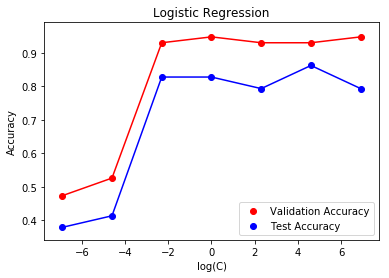

Best performing C on Validation set:  1
Best performing C on Test set:  100


In [39]:
Cs =  [0.001, 0.01, 0.1, 1, 10, 100, 1000]

param_grid = {'C': Cs}
clf = GridSearchCV(LogisticRegression(), param_grid, cv = 10)
clf.fit(X_train, np.ravel(Y_train))
accuracy_cv = clf.cv_results_['mean_test_score']

test_MSE_s = []

for c in Cs:
    r = LogisticRegression(C = c)
    r.fit(X_train, np.ravel(Y_train))
   # Y_pred = r.predict(X_test)
    
    accuracy = r.score(X_test, Y_test)
    test_MSE_s.append(accuracy)
    
f, ax = plt.subplots()    
ax.scatter(np.log(Cs), accuracy_cv, label = "Validation Accuracy",c="red")
ax.plot(np.log(Cs), accuracy_cv,c="red")
ax.set_xlabel("log(C)")
ax.set_ylabel("Accuracy")        
ax.scatter(np.log(Cs), test_MSE_s, label = "Test Accuracy",c="blue")
ax.plot(np.log(Cs), test_MSE_s,c="blue")
plt.legend()
plt.title("Logistic Regression")
plt.show()

print("Best performing C on Validation set: ", Cs[np.argmax(accuracy_cv)])
print("Best performing C on Test set: ", Cs[np.argmax(test_MSE_s)])

In [40]:
X, Y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, random_state=300, class_sep=1)
X_train, Y_train = X[:300], Y[:300]
X_test, Y_test = X[300:], Y[300:]

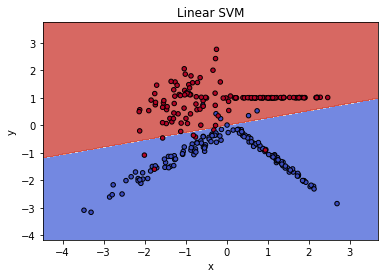

In [41]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

C = 1.0
model = LinearSVC(C = C)
model = model.fit(X_train, Y_train)

xx, yy = make_meshgrid(X_train[:, 0], X_train[:, 1])
    
plot_contours(plt, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('x')
plt.ylabel('y')
plt.title("Linear SVM")
plt.show()

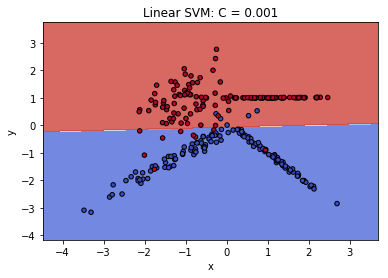

In [42]:
C = 0.001
model = LinearSVC(C = C)
model = model.fit(X_train, Y_train)

xx, yy = make_meshgrid(X_train[:, 0], X_train[:, 1])
    
plot_contours(plt, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('x')
plt.ylabel('y')
plt.title("Linear SVM: C = 0.001")
plt.show()

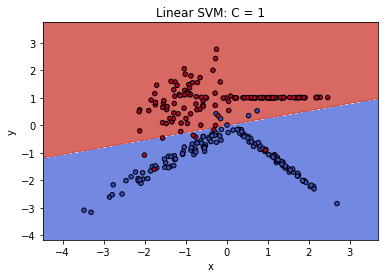

In [43]:
C = 1
model = LinearSVC(C = C)
model = model.fit(X_train, Y_train)

xx, yy = make_meshgrid(X_train[:, 0], X_train[:, 1])
    
plot_contours(plt, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('x')
plt.ylabel('y')
plt.title("Linear SVM: C = 1")
plt.show()

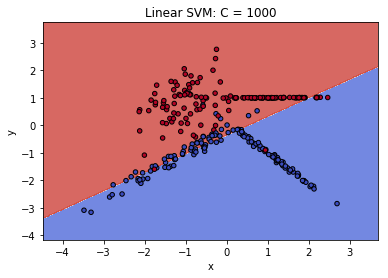

In [44]:
C = 1000
model = LinearSVC(C = C)
model = model.fit(X_train, Y_train)

xx, yy = make_meshgrid(X_train[:, 0], X_train[:, 1])
    
plot_contours(plt, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('x')
plt.ylabel('y')
plt.title("Linear SVM: C = 1000")
plt.show()

The hyperplane becomes less data dependent for higher $C$.

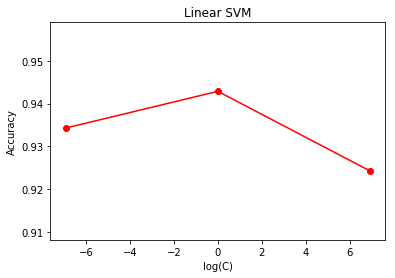

Best performing C:  1


In [45]:
Cs = [0.001, 1, 1000]
test_MSE_s = []

for c in Cs:
    r = LinearSVC(C = c)
    r.fit(X_train, np.ravel(Y_train))
  
    accuracy = r.score(X_test, Y_test)
    test_MSE_s.append(accuracy)
      
plt.xlabel("log(C)")
plt.ylabel("Accuracy")        
plt.scatter(np.log(Cs), test_MSE_s, c="red")
plt.plot(np.log(Cs), test_MSE_s, c="red")
plt.title("Linear SVM")
plt.show()

print("Best performing C: ", Cs[np.argmax(test_MSE_s)])

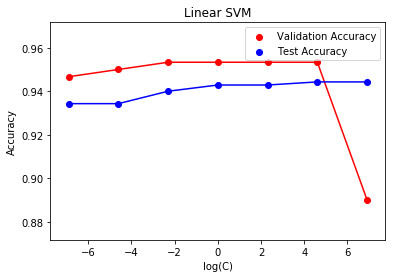

Best performing C on Validation set:  0.1
Best performing C on Test set:  100


In [46]:
Cs =  [0.001, 0.01, 0.1, 1, 10, 100, 1000]

param_grid = {'C': Cs}
clf = GridSearchCV(LinearSVC(), param_grid, cv = 10)
clf.fit(X_train, np.ravel(Y_train))
accuracy_cv = clf.cv_results_['mean_test_score']

test_MSE_s = []

for c in Cs:
    r = LinearSVC(C = c)
    r.fit(X_train, np.ravel(Y_train))
  #  Y_pred = r.predict(X_test)
    
    accuracy = r.score(X_test, Y_test)
    test_MSE_s.append(accuracy)
    
f, ax = plt.subplots()    
ax.scatter(np.log(Cs), accuracy_cv, label = "Validation Accuracy",c="red")
ax.plot(np.log(Cs), accuracy_cv,c="red")
ax.set_xlabel("log(C)")
ax.set_ylabel("Accuracy")        
ax.scatter(np.log(Cs), test_MSE_s, label = "Test Accuracy",c="blue")
ax.plot(np.log(Cs), test_MSE_s,c="blue")
plt.legend()
plt.title("Linear SVM")
plt.show()

print("Best performing C on Validation set: ", Cs[np.argmax(accuracy_cv)])
print("Best performing C on Test set: ", Cs[np.argmax(test_MSE_s)])

In [47]:
with open("dataset_1.pickle", "rb") as f:
    X_1, Y_1 = pickle.load(f)
X_1_train, Y_1_train = X_1[:100], Y_1[:100]
X_1_test, Y_1_test = X_1[100:], Y_1[100:]

In [48]:
with open("dataset_2.pickle", "rb") as f:
    X_2, Y_2 = pickle.load(f)
X_2_train, Y_2_train = X_2[:100], Y_2[:100]
X_2_test, Y_2_test = X_2[100:], Y_2[100:]

In [49]:
svc = LinearSVC()
svc.fit(X_1_train, Y_1_train)
score1 = svc.score(X_1_test, Y_1_test)
print("Data set 1: {:.2f}".format(score1))

svc = LinearSVC()
svc.fit(X_2_train, Y_2_train)
score2 = svc.score(X_2_test, Y_2_test)
print("Data set 2: {:.2f}".format(score2))

Data set 1: 0.99
Data set 2: 0.79


Data set 1 is linearly separable. Data set 2 is not. In data set 2, the point clouds overlap each other.

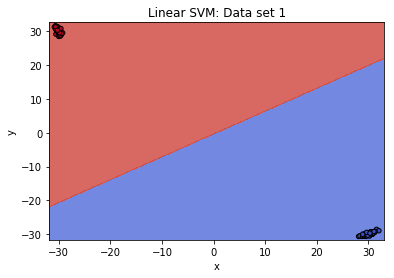

In [50]:
xx, yy = make_meshgrid(X_1_train[:, 0], X_1_train[:, 1])
plot_contours(plt, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_1_train[:, 0], X_1_train[:, 1], c=Y_1_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('x')
plt.ylabel('y')
plt.title("Linear SVM: Data set 1")
plt.show()

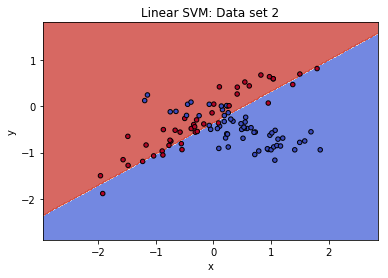

In [51]:
xx, yy = make_meshgrid(X_2_train[:, 0], X_2_train[:, 1])
plot_contours(plt, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_2_train[:, 0], X_2_train[:, 1], c=Y_2_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('x')
plt.ylabel('y')
plt.title("Linear SVM: Data set 2")
plt.show()